In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
# Replace 'winning_numbers.csv' with the actual path to your dataset
df = pd.read_csv('MegaMillion_All_Winning_Numbers.csv')


In [9]:
# Assuming your dataset has columns 'WinningNumber1', 'WinningNumber2', etc.
# If your dataset is already in a single column, skip this step.
df['WinningNumber'] = df[['WinningNumber1', 'WinningNumber2', 'WinningNumber3', 'WinningNumber4', 'WinningNumber5']].stack().reset_index(drop=True)


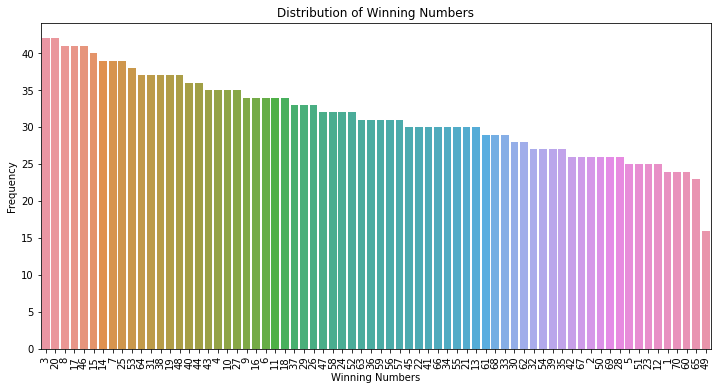

In [10]:
plt.figure(figsize=(12, 6))
sns.countplot(x='WinningNumber', data=df, order=df['WinningNumber'].value_counts().index)
plt.xlabel('Winning Numbers')
plt.ylabel('Frequency')
plt.title('Distribution of Winning Numbers')
plt.xticks(rotation=90)
plt.show()


In [11]:
winning_number_counts = df['WinningNumber'].value_counts().reset_index()
winning_number_counts.columns = ['WinningNumber', 'Frequency']
sorted_winning_numbers = winning_number_counts.sort_values(by='Frequency', ascending=False)


In [12]:
print(sorted_winning_numbers)


    WinningNumber  Frequency
0               3         42
1              20         42
2               8         41
3              17         41
4              46         41
..            ...        ...
65              1         24
66             70         24
67             60         24
68             65         23
69             49         16

[70 rows x 2 columns]


In [13]:
# Assuming you have the sorted_winning_numbers DataFrame ready
# Replace 'path/to/new_file.csv' with the desired file path and name
sorted_winning_numbers.to_csv('sorted_winning_numbers.csv', index=True)


In [15]:
print(sorted_winning_numbers.tail(10))

    WinningNumber  Frequency
60             28         26
63             23         25
64             12         25
61              5         25
62             51         25
65              1         24
66             70         24
67             60         24
68             65         23
69             49         16


In [20]:
import numpy as np

def generate_random_numbers(df, num_numbers=5):
    # Calculate the probabilities based on the inverse of frequencies
    probabilities = 1 / df['Frequency']
    probabilities /= probabilities.sum()

    # Generate 5 random numbers using the calculated probabilities
    random_numbers = np.random.choice(df['WinningNumber'], size=num_numbers, p=probabilities, replace=False)

    return random_numbers


In [22]:
# Assuming you have the sorted_winning_numbers DataFrame ready
# Replace 'sorted_winning_numbers' with your actual DataFrame
random_numbers = generate_random_numbers(sorted_winning_numbers)

print("Randomly picked numbers:", random_numbers)


Randomly picked numbers: [49 26 29 69 30]


In [19]:
import pandas as pd
import numpy as np

def generate_random_numbers(df, num_sets=1, num_to_pick=5):
    all_random_numbers = []

    for _ in range(num_sets):
        # Calculate the probability distribution based on frequency
        freq_counts = df['WinningNumber'].value_counts()
        probabilities = 1 / (freq_counts + 1)  # Adding 1 to avoid division by zero

        # Normalize the probabilities to sum up to 1
        probabilities /= probabilities.sum()

        # Generate random numbers based on the probabilities
        random_numbers = np.random.choice(freq_counts.index, size=num_to_pick, p=probabilities, replace=False)
        all_random_numbers.append(random_numbers)

    return all_random_numbers

# Assuming you have the sorted_winning_numbers DataFrame
num_sets_to_generate = 6
randomly_picked_numbers_sets = generate_random_numbers(sorted_winning_numbers, num_sets=num_sets_to_generate)

for i, numbers_set in enumerate(randomly_picked_numbers_sets):
    print(f"Set {i + 1}: {numbers_set}")


Set 1: [33 61 26  8 38]
Set 2: [35 62 27  5 10]
Set 3: [ 1 27 57 20 40]
Set 4: [ 6 23 29 66 15]
Set 5: [19 10 26 45 67]
Set 6: [67 54 46 33 49]


In [23]:
import numpy as np

def generate_random_numbers_sets(df, num_sets=5, num_numbers=5):
    all_random_numbers = []

    for _ in range(num_sets):
        # Calculate the probabilities based on the inverse of frequencies
        probabilities = 1 / df['Frequency']
        probabilities /= probabilities.sum()

        # Generate 'num_numbers' random numbers using the calculated probabilities
        random_numbers = np.random.choice(df['WinningNumber'], size=num_numbers, p=probabilities, replace=False)

        all_random_numbers.append(random_numbers)

    return all_random_numbers


In [28]:
# Assuming you have the sorted_winning_numbers DataFrame ready
# Replace 'sorted_winning_numbers' with your actual DataFrame
num_sets = 5
random_numbers_sets = generate_random_numbers_sets(sorted_winning_numbers, num_sets=num_sets)

# Display the 5 sets of randomly picked numbers
for i, numbers in enumerate(random_numbers_sets):
    print(f"Set {i+1}: {numbers}")


Set 1: [39 58 30 26 70]
Set 2: [55 39 29 65 28]
Set 3: [11 49 20 34 67]
Set 4: [24 49 67 32 47]
Set 5: [23 45 29 56 55]
